In [1]:
#Metro_Bike_Share_Trip_Data.csv data from 2016-2020
#price is 1.75/ride
#132,427 rides
import pandas as pd

df = pd.read_csv('Metro_Bike_Share_Trip_Data.csv', index_col=None)

display(df)

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long
0,18222186,15060,01/19/2017 05:05:00 PM,01/19/2017 09:16:00 PM,3031.0,34.044701,-118.252441,3000.0,NaN,NaN,5944.0,0.0,One Way,Walk-up,NaN,NaN
1,9518671,77160,10/09/2016 02:37:00 PM,10/10/2016 12:03:00 PM,NaN,NaN,NaN,3000.0,NaN,NaN,6603.0,30.0,One Way,Monthly Pass,NaN,NaN
2,20444932,86400,02/18/2017 10:15:00 AM,02/20/2017 03:20:00 PM,3026.0,34.063179,-118.245880,3000.0,NaN,NaN,5879.0,0.0,One Way,Walk-up,NaN,NaN
3,20905031,18840,02/27/2017 12:26:00 PM,02/27/2017 05:40:00 PM,3023.0,34.050911,-118.240967,3000.0,NaN,NaN,6056.0,0.0,One Way,Walk-up,NaN,NaN
4,21031476,86400,02/27/2017 08:26:00 PM,03/01/2017 09:49:00 AM,3008.0,34.046612,-118.262733,3000.0,NaN,NaN,6054.0,365.0,One Way,Flex Pass,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132422,4907293,2520,08/06/2016 02:35:00 PM,08/06/2016 03:17:00 PM,3052.0,34.051102,-118.264560,3052.0,34.051102,-118.26456,6316.0,0.0,Round Trip,Walk-up,"(34.0511017, -118.26456)","(34.0511017, -118.26456)"
132423,4908300,1080,08/08/2016 07:18:00 AM,08/08/2016 07:36:00 AM,3027.0,34.049980,-118.247160,3057.0,34.035679,-118.27081,6541.0,30.0,One Way,Monthly Pass,"(34.0499802, -118.24716)","(34.0356789, -118.27081)"
132424,4726795,1500,07/30/2016 03:52:00 PM,07/30/2016 04:17:00 PM,3014.0,34.056610,-118.237210,3020.0,34.031052,-118.26709,6417.0,30.0,One Way,Monthly Pass,"(34.0566101, -118.23721)","(34.0310516, -118.26709)"
132425,5034026,780,08/12/2016 09:17:00 AM,08/12/2016 09:30:00 AM,3036.0,34.039188,-118.232530,3055.0,34.044159,-118.25158,6369.0,365.0,One Way,Flex Pass,"(34.0391884, -118.23253)","(34.0441589, -118.25158)"


Overall average duration(hours) over all types of trips is 25.92169270617019


<AxesSubplot:>

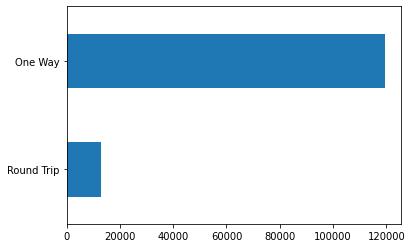

In [2]:
#average duration
avg_duration= df['Duration'].mean()#in minutes
avg_duration = avg_duration/60#in hours
print('Overall average duration(hours) over all types of trips is', avg_duration)
#find out what the station IDs mean

#count one way vs round trip
df['Trip Route Category'].value_counts()
df['Trip Route Category'].value_counts().sort_values().plot(kind = 'barh')


In [3]:
#how long do members vs nonmembers ride for
df.groupby(['Trip Route Category','Passholder Type'] )['Duration'].mean()/60#in minutes

#on average, those with memberships have a shorter ride time than those without memberships(walk ups).
#this mausuggests that people who get memberships for bikeshare apps use it to commute

Trip Route Category  Passholder Type
One Way              Flex Pass          18.642683
                     Monthly Pass       13.772584
                     Staff Annual       55.217391
                     Walk-up            45.249840
Round Trip           Flex Pass          42.492754
                     Monthly Pass       25.661453
                     Staff Annual        8.710843
                     Walk-up            68.520421
Name: Duration, dtype: float64

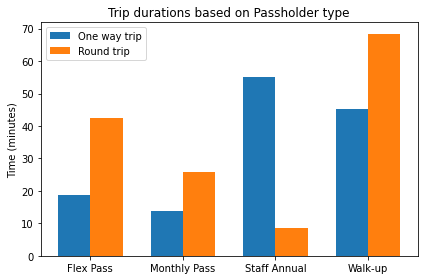

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['Flex Pass', 'Monthly Pass', 'Staff Annual', 'Walk-up']
one = [18.6, 13.8, 55.2, 45.2]
round = [42.5, 25.7, 8.7, 68.5]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, one, width, label='One way trip')
rects2 = ax.bar(x + width/2, round, width, label='Round trip')

ax.set_ylabel('Time (minutes)')
ax.set_title('Trip durations based on Passholder type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



fig.tight_layout()

plt.show()



<AxesSubplot:>

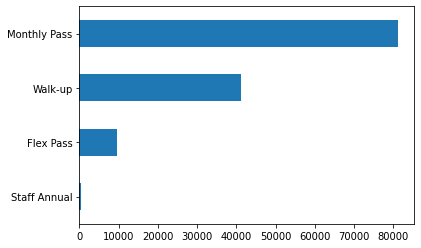

In [5]:
#passholder type
df['Passholder Type'].value_counts()
df['Passholder Type'].value_counts().sort_values().plot(kind = 'barh')


In [6]:
#how long people have had the pass
df['Plan Duration'].value_counts()

30.0     80920
0.0      41224
365.0     9517
Name: Plan Duration, dtype: int64